In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
df = pd.read_excel("/Users/manishak/Downloads/Book1.xlsx")

In [5]:
print(df)

           Date  Closing Volume         Volume  50-Day Moving Average   
0    2020-01-01       59.746333  916154.106622              48.965459  \
1    2020-01-02       14.017123  978116.660674              49.617604   
2    2020-01-03       12.302963   15696.133135              50.948596   
3    2020-01-04       11.573981  666210.118867              51.439419   
4    2020-01-05       90.893874  835636.264069              51.926821   
...         ...             ...            ...                    ...   
2495 2026-10-31       14.093895  389125.499888              28.138658   
2496 2026-11-01       20.937880  734552.817679              31.649849   
2497 2026-11-02       65.413928  547989.382303              35.220505   
2498 2026-11-03       22.253731   49614.739118              20.123793   
2499 2026-11-04       17.993856  372201.515651              17.993856   

      200-Day Moving Average  
0                  52.232315  
1                  52.190672  
2                  52.389854  

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2500 non-null   datetime64[ns]
 1   Closing Volume          2500 non-null   float64       
 2   Volume                  2500 non-null   float64       
 3   50-Day Moving Average   2500 non-null   float64       
 4   200-Day Moving Average  2500 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 97.8 KB
None
        Date  Closing Volume         Volume  50-Day Moving Average   
0 2020-01-01       59.746333  916154.106622              48.965459  \
1 2020-01-02       14.017123  978116.660674              49.617604   
2 2020-01-03       12.302963   15696.133135              50.948596   
3 2020-01-04       11.573981  666210.118867              51.439419   
4 2020-01-05       90.893874  835636.264069              51

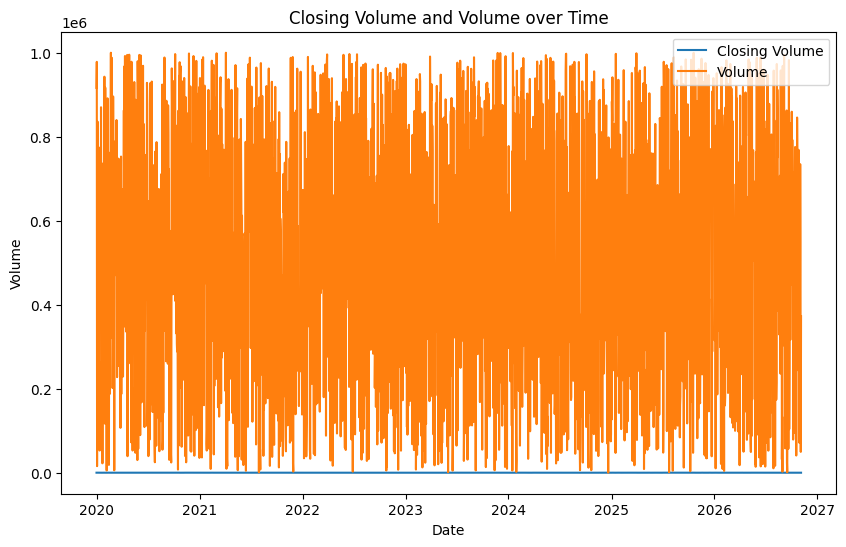

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Closing Volume', data=df, label='Closing Volume')
sns.lineplot(x='Date', y='Volume', data=df, label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Closing Volume and Volume over Time')
plt.legend()
plt.show()

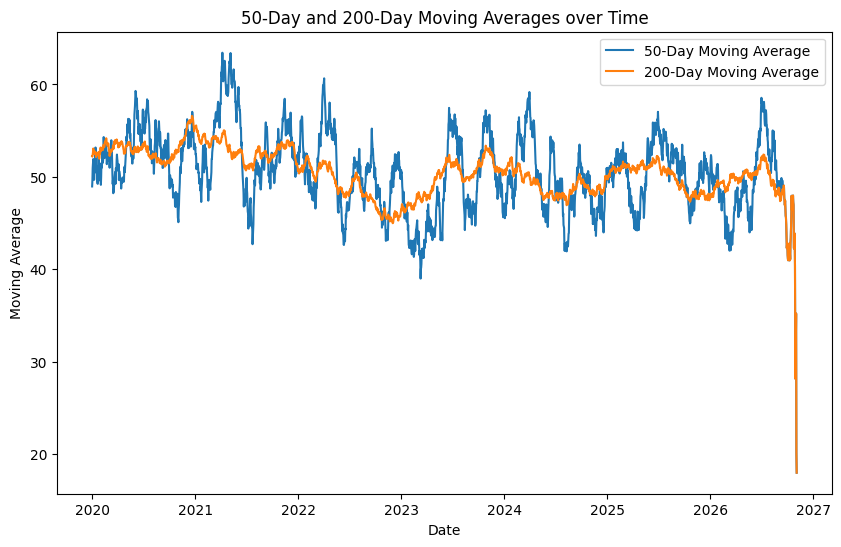

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='50-Day Moving Average', data=df, label='50-Day Moving Average')
sns.lineplot(x='Date', y='200-Day Moving Average', data=df, label='200-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('50-Day and 200-Day Moving Averages over Time')
plt.legend()
plt.show()

In [23]:
# Calculate the average volume for the entire dataset

average_volume = df['Volume'].mean()
print("Average Volume:", average_volume)

Average Volume: 500098.6523897512


In [24]:
# Calculate the correlation between Closing Volume and Volume
correlation = df['Closing Volume'].corr(df['Volume'])
print("Correlation between Closing Volume and Volume:", correlation)

Correlation between Closing Volume and Volume: 0.003137230904364112


In [25]:
# Set the 'Date' column as the index

df.set_index('Date', inplace=True)

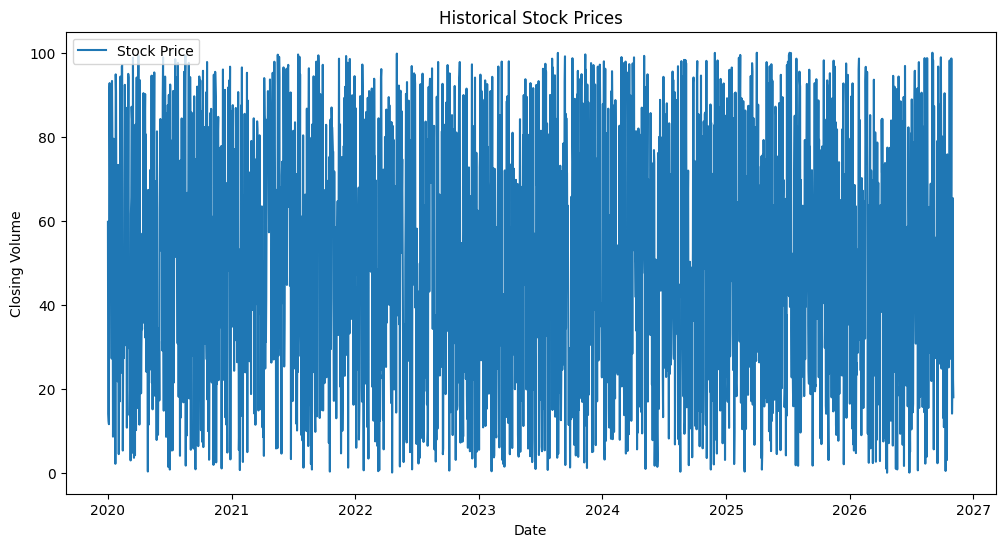

In [26]:
# Plot the stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Closing Volume'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Volume')
plt.title('Historical Stock Prices')
plt.legend()
plt.show()

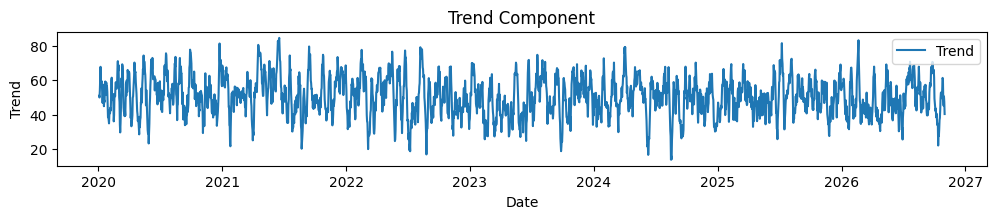

In [28]:
# Decompose the time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(df['Closing Volume'], model='additive')
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')
plt.legend()

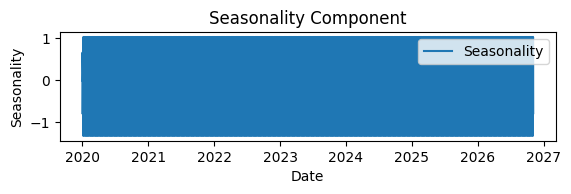

In [40]:
plt.subplot(3,1,1)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality Component')
plt.legend()

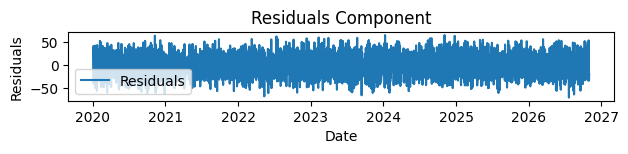

In [41]:
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Component')
plt.legend()

plt.tight_layout()
plt.show()

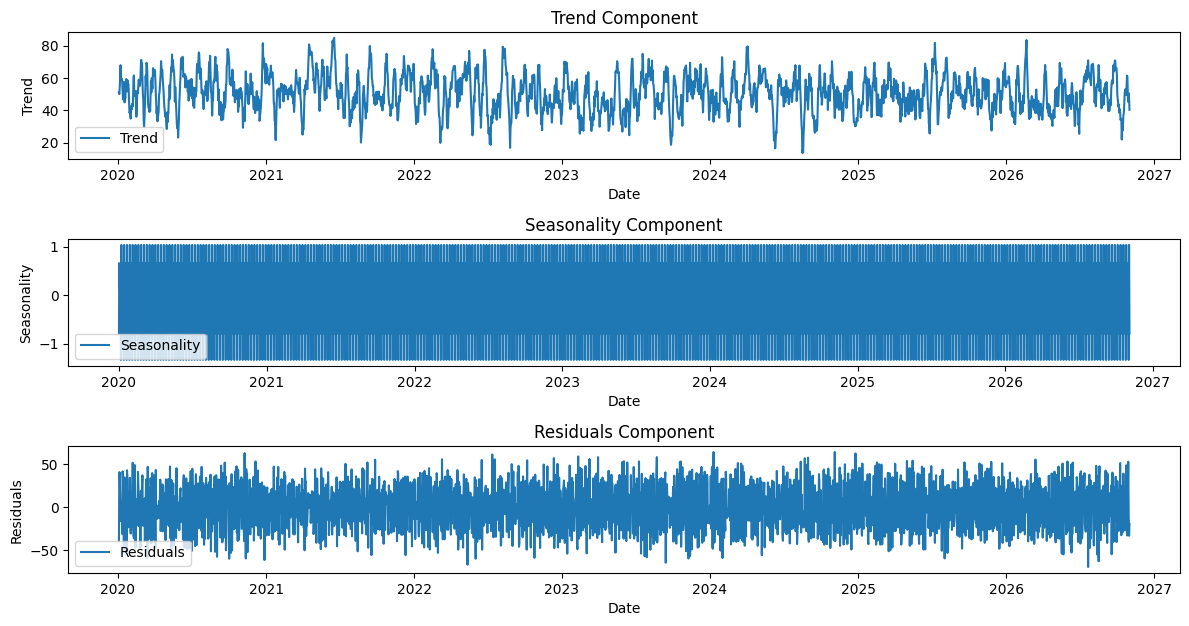

In [42]:
# Decompose the time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(df['Closing Volume'], model='additive')
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Component')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# Perform time series forecasting using ARIMA model (AutoRegressive Integrated Moving Average)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]
train_size

2000

In [44]:
# Fit the ARIMA model on the training data
order = (2, 1, 2)  # (p, d, q) values for the ARIMA model
model = ARIMA(train_data['Closing Volume'], order=order)
results = model.fit()

C:\Users\manishak\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\manishak\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\manishak\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [45]:
# Make predictions on the test data
predictions = results.forecast(steps=len(test_data))
predictions

2025-06-23    49.342393
2025-06-24    49.552205
2025-06-25    49.337212
2025-06-26    49.532180
2025-06-27    49.355240
                ...    
2026-10-31    49.439421
2026-11-01    49.439421
2026-11-02    49.439421
2026-11-03    49.439421
2026-11-04    49.439421
Freq: D, Name: predicted_mean, Length: 500, dtype: float64

In [46]:
# Evaluate the ARIMA model's performance
mse = mean_squared_error(test_data['Closing Volume'], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 804.1208192463378


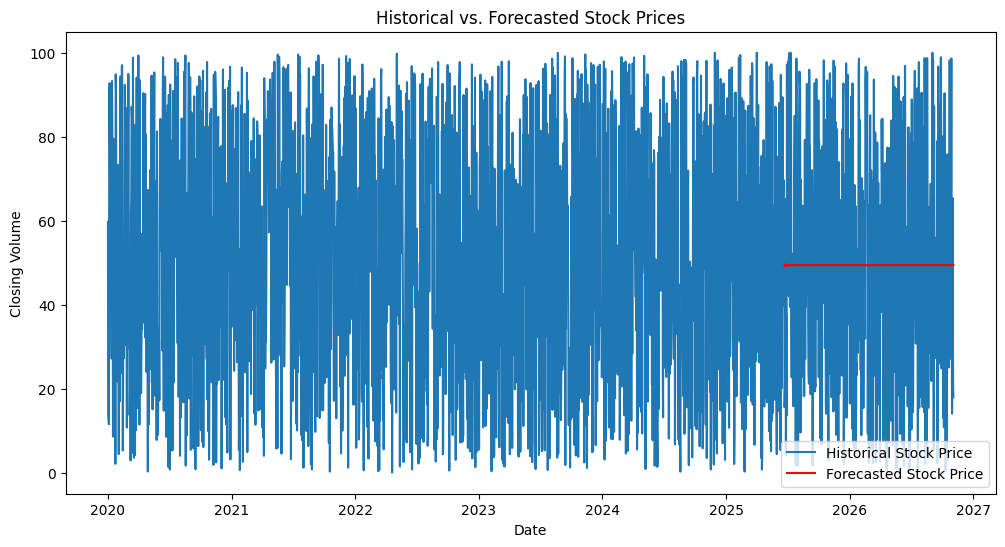

In [47]:
# Visualize the forecasted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(df['Closing Volume'], label='Historical Stock Price')
plt.plot(test_data.index, predictions, label='Forecasted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Volume')
plt.title('Historical vs. Forecasted Stock Prices')
plt.legend()
plt.show()